In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
base = pd.read_csv(r"C:\Users\Ryan\OneDrive\Documentos\GitHub\analise_imobiliaria_petropolitana\imoveis_petropolis_2025-09-27.csv", sep = ";")

In [20]:
base.head()

,valor,m2,quartos,vagas,banheiros,iptu,condominio,data_anuncio,link,imagem,data,cidade,bairro,latitude,longitude,hash_imagem,hash_str
0,455000,70,2.0,1.0,2.0,332,751,2025-09-26 21:26:00,https://rj.olx.com.br/serra-angra-dos-reis-e-r...,imagens\809548138667735.webp,2025-09-27,Petrópolis,Itaipava,-22.412700,-43.142100,ffde00000040df7f,ffde00000040df7f
1,430000,56,2.0,1.0,1.0,110,210,2025-09-26 11:12:00,https://rj.olx.com.br/serra-angra-dos-reis-e-r...,imagens\119505194936684.webp,2025-09-27,Petrópolis,Corrêas,-22.442565,-43.139706,ffff7f5330202010,ffff7f5330202010
2,150000,62,1.0,NaN,1.0,NaN,NaN,2025-09-25 14:37:00,https://rj.olx.com.br/serra-angra-dos-reis-e-r...,imagens\686564086666094.webp,2025-09-27,Petrópolis,Quissama,-22.492869,-43.159080,800002dee0e0fcfc,800002dee0e0fcfc
3,1950000,157,4.0,3.0,1.0,389,1.010,2025-09-27 13:53:00,https://rj.olx.com.br/serra-angra-dos-reis-e-r...,imagens\617521442792009.webp,2025-09-27,Petrópolis,Araras,-22.425156,-43.221496,ddd0ac0337721f86,ddd0ac0337721f86
4,4200000,4600,4.0,2.0,3.0,300,1.560,2025-09-27 13:53:00,https://rj.olx.com.br/serra-angra-dos-reis-e-r...,imagens\621572563578972.webp,2025-09-27,Petrópolis,Araras,-22.425156,-43.221496,9093110000674fff,9093110000674fff


In [21]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4861 entries, 0 to 4860
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   valor         4861 non-null   int64  
 1   m2            4861 non-null   int64  
 2   quartos       4854 non-null   float64
 3   vagas         3833 non-null   float64
 4   banheiros     4844 non-null   float64
 5   iptu          3316 non-null   object 
 6   condominio    2613 non-null   object 
 7   data_anuncio  4861 non-null   object 
 8   link          4861 non-null   object 
 9   imagem        4854 non-null   object 
 10  data          4861 non-null   object 
 11  cidade        4861 non-null   object 
 12  bairro        4861 non-null   object 
 13  latitude      4835 non-null   float64
 14  longitude     4835 non-null   float64
 15  hash_imagem   4854 non-null   object 
 16  hash_str      4854 non-null   object 
dtypes: float64(5), int64(2), object(10)
memory usage: 645.7+ KB


<Axes: xlabel='valor'>

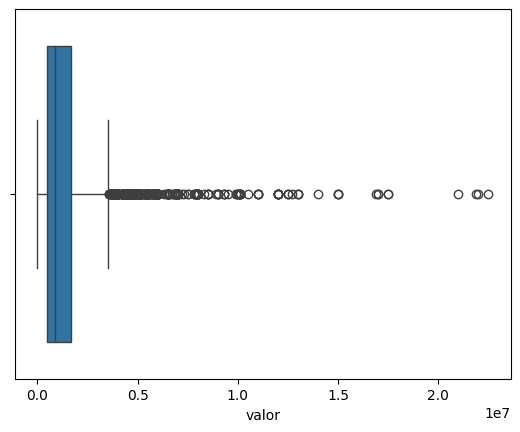

In [23]:
sns.boxplot(x=base['valor'])